# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

## 1. Linear Potential

<font  face=Times color=darkblue size=3> Here, we consider a linear potential case: $V(x)=|x|$ with the same boundary conditions. For the discretization: we have $n=224$ and set $dx=0.1$, with $x=(i-\frac{n+1}{2})\cdot dx$ and $i=1,\dots,n$.<br><br> Using the numerov matrix method: 

In [47]:
#set parameter
n=224
dx=0.1

In [38]:
diag_0=np.diag(np.ones(n),0)
diag_p1=np.diag(np.ones(n-1),1)
diag_m1=np.diag(np.ones(n-1),-1)

In [39]:
mat_A=(1/dx**2)*(diag_m1-2*diag_0+diag_p1)
mat_B=(1/12)*(diag_m1+10*diag_0+diag_p1)

In [40]:
gamma2=2

In [41]:
mat_v=np.zeros((n,n))
for i in range(1,n+1):
    mat_v[i-1,i-1]=abs(i-(n+1)/2)*dx

In [42]:
#add v
the_matrix=((-1/gamma2)*np.dot(np.linalg.inv(mat_B),mat_A)+mat_v)

In [43]:
E_list2,wf_list2=np.linalg.eig(the_matrix)
idx_sorted2 = np.argsort(E_list2)
E_list2=E_list2[idx_sorted2]
wf_list2=wf_list2[:,idx_sorted2]

In [44]:
n_list=np.arange(1,n+1)-(n+1)/2

No handles with labels found to put in legend.


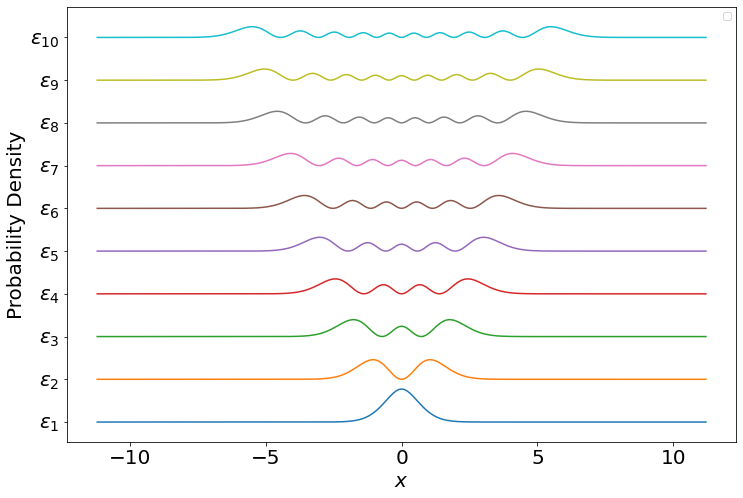

In [45]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot((n_list)*dx,(wf_list2[:,i])**2+i*0.08)#,label='n=20 wavefunction')
plt.legend()
plt.xlabel(r'$x$',{'size':20})
plt.ylabel('Probability Density',{'size':20})
plt.yticks([0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,0.64,0.72],[r'$\epsilon_1$',r'$\epsilon_2$',r'$\epsilon_3$',r'$\epsilon_4$',r'$\epsilon_5$',r'$\epsilon_6$',r'$\epsilon_7$',r'$\epsilon_8$',r'$\epsilon_9$',r'$\epsilon_{10}$'])
plt.tick_params(labelsize=20)

In [46]:
E_list2[0:10]

array([0.80758266, 1.85575676, 2.57776626, 3.24460068, 3.82548155,
       4.38165236, 4.89161943, 5.38657765, 5.85110811, 6.3052043 ])

## 2.2 Time-Dependent Schrodinger Equation

### Introduction

<font  face=Times color=darkblue size=3>Next, we consider time-dependent Schrodinger equation:$$i\hbar\frac{\partial}{\partial t}\psi(t,x)=H(x)\psi(t,x)$$
<br><br>Using Crank-Nicolson Scheme, the equation can be written as:$$i\hbar\frac{\psi^{n+1}_r-\psi^{n}_r}{\tau}=\sum_{s=1}^NH_{r,s}\frac{1}{2}(\psi_s^n+\psi_s^{n+1})$$
with $H_{r,s}=-\frac{\hbar^2}{2m}\frac{\delta_{r+1,s}+\delta_{r-1,s}-2\delta_{r,s}}{h^2}+V(x_r)\delta_{r,s}$
<br><br>Further:$$\psi^{n+1}=(1+\frac{i\tau}{2\hbar}H)^{-1}(1-\frac{i\tau}{2\hbar}H)\psi^n$$
<br><br>Initial condition:$\psi(t=0,x)=\frac{1}{\sqrt{\sigma_0\sqrt{2\pi}}}e^{ik_0x}e^{-\frac{1}{2}\frac{(x-x_0)^2}{2\sigma_0^2}}$,
<br>$\hbar=m=1,x_0=-10,L=40,\sigma_0=1,k_0=7,N=401,\tau=0.0002,h=L/N$.

<font  face=Times color=darkblue size=3>We add rectangular potential barrier of $V=k_0^2/2$ at $-4<x<-2$ and $2<x<4$.

In [60]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [61]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(2*np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(2*np.power(sigma0,2)))

In [62]:
#build the H matrix (add V)
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    if 160<i<180 or 220<i<240:
        matrix_H[i,i]+=k0**2/2

In [63]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [64]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

"\ndef animate2(i):\n    xx=x_list\n    yy=abs(psi_list[i*4])**2\n    line2.set_data(xx, yy)\n    return (line2,)\nanim2 = animation.FuncAnimation(fig2, animate2, frames=150, interval=150, blit=True)\nrc('animation', html='jshtml')\nanim2\n"

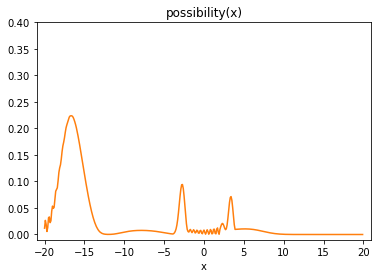

In [81]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], lw=2)
plt.xlim(-21,21)
plt.ylim(-0.01,0.4)
ax2.set_xlabel('x')
ax2.set_title('possibility(x)')
plt.plot(x_list,abs(psi_list[115])**2)
'''
def animate2(i):
    xx=x_list
    yy=abs(psi_list[i*4])**2
    line2.set_data(xx, yy)
    return (line2,)
anim2 = animation.FuncAnimation(fig2, animate2, frames=150, interval=150, blit=True)
rc('animation', html='jshtml')
anim2
'''

<font  face=Times color=darkblue size=3>Now, you could easily see the difference of propogation.